In [1]:
import os
from pathlib import Path
import h5py

import numpy as np
from numba import njit
import scipy.signal as sg

import readSim as rs

import matplotlib.pyplot as plt
%matplotlib widget


In [2]:
sims = rs.Sims('/home/lorenzo/phd/LQG/LifetimeConvergence')

times = []
times_corrected = []
times_finer = []
times_corrected_finer = []
dxs = []
dxs_corrected = []
dxs_finer = []
dxs_corrected_finer = []

for sim in sims[:]:
    name = sim.name
    time_out = sim.find_timeout()
    if 'finer' in name and 'corrected' in name:
        times_corrected_finer.append(time_out)
        dxs_corrected_finer.append(sim['dx'])
    elif 'corrected' in name and not 'finer' in name:
        times_corrected.append(time_out)
        dxs_corrected.append(sim['dx'])
    elif 'finer' in name and not 'corrected' in name:
        times_finer.append(time_out)
        dxs_finer.append(sim['dx'])
    else:
        times.append(time_out)
        dxs.append(sim['dx'])

tosave = {'times_corrected_finer' : times_corrected_finer,
          'dxs_corrected_finer'   : dxs_corrected_finer,
          'times_corrected'       : times_corrected,
          'dxs_corrected'         : dxs_corrected,
          'times_finer'           : times_finer,
          'dxs_finer'             : dxs_finer,
          'times'                 : times,
          'dxs'                   : dxs
          }

import pickle 

with open('/home/lorenzo/phd/LQG/LifetimeConvergence/times_vs_dxs.pkl', 'wb') as f:
    pickle.dump(tosave, f)

In [4]:
import pickle 
with open('/home/lorenzo/phd/LQG/LifetimeConvergence/times_vs_dxs.pkl', 'rb') as f:
    ldict = pickle.load(f)

times_corrected_finer = ldict['times_corrected_finer']
dxs_corrected_finer   = ldict['dxs_corrected_finer' ]
times_corrected       = ldict['times_corrected']  
dxs_corrected         = ldict['dxs_corrected'] 
times_finer           = ldict['times_finer'] 
dxs_finer             = ldict['dxs_finer'] 
times                 = ldict['times'] 
dxs                   = ldict['dxs'] 

Text(0, 0.5, '$T_{out}$')

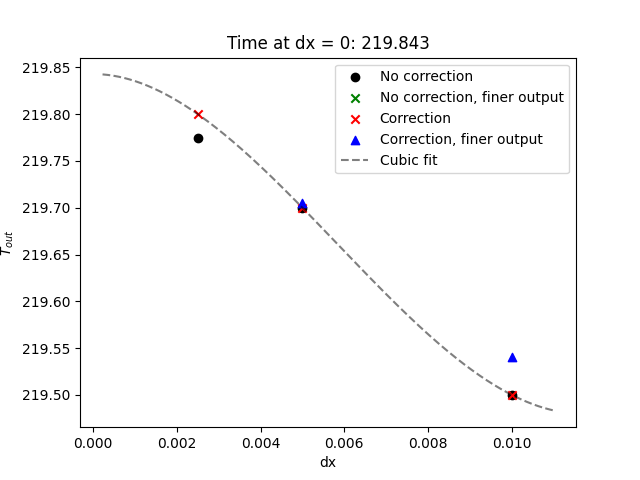

In [6]:
import scipy.optimize as op

def f(x,a,b,d):
    return -a*x**3 + b*x**2 + d

m = 5
r0 = 5
a0 = 14
Rs = 2*m
eps0 = -(r0 / a0)**2
T_anal = np.pi*Rs**2 * np.log( (1 + eps0)**2 * np.exp( (eps0 - 1)**2 - 1 ) ) / eps0**3

fig = plt.figure()

plt.scatter(dxs, times, marker = 'o', color = 'k', label = 'No correction')
plt.scatter(dxs_finer, times_finer, marker = 'x', color = 'g', label = 'No correction, finer output')
plt.scatter(dxs_corrected, times_corrected, marker = 'x', color = 'r', label = 'Correction')
plt.scatter(dxs_corrected_finer, times_corrected_finer, marker = '^', color = 'b', label = 'Correction, finer output')

# plt.axhline(T_anal, color='k', ls='--', alpha=0.5, label = 'Analytical')

# plt.xscale('log')
# plt.yscale('log')

# qfit = np.polyfit(dxs, times, 2)
# pfit = np.poly1d(qfit)
# plt.plot(xxx, pfit(xxx), linestyle = '--', color = 'k', alpha = 0.5, label = 'Quadratic fit')


popt, pcov = op.curve_fit(f, dxs_corrected, times_corrected)

xxx = np.linspace(np.min(dxs_corrected)*0.09, np.max(dxs_corrected)*1.1, 1000)
plt.plot(xxx, f(xxx, *popt), linestyle = '--', color = 'k', alpha = 0.5, label = 'Cubic fit')

plt.title(f'Time at dx = 0: {np.round(f(0, *popt),3)}')

plt.legend()
plt.xlabel('dx')
plt.ylabel(r'$T_{out}$')
